In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


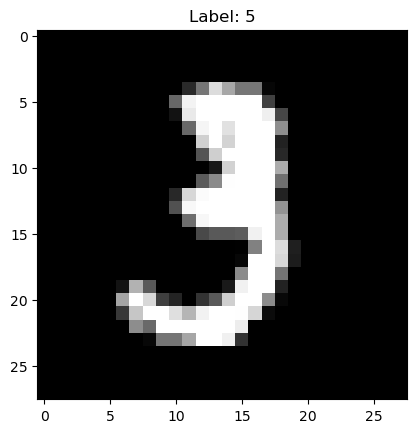

In [2]:
import matplotlib.pyplot as plt

# 加載數據
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[10], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

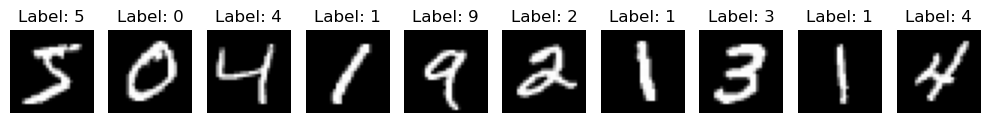

In [3]:
# 使用 matplotlib 顯示多張 MNIST 圖像

# 設置圖像數量
num_images = 10

# 創建一個圖形和一組子圖
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, ax in enumerate(axes):
    # 顯示第 i 張圖像
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')  # 不顯示軸

plt.tight_layout()
plt.show()

In [4]:
x_train.shape

(60000, 28, 28)

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.utils import to_categorical

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Image data format
  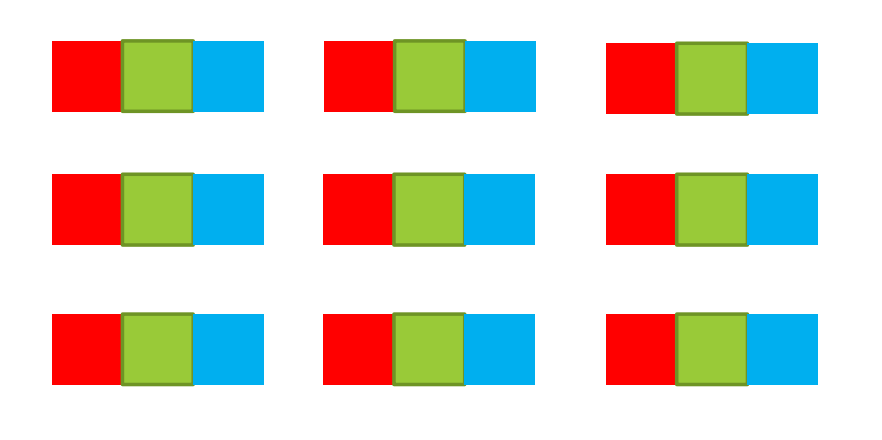
  ### [ [ [R,G,B], [R,G,B], [R,G,B] ],  
###   [ [R,G,B], [R,G,B], [R,G,B] ],
###   [ [R,G,B], [R,G,B], [R,G,B] ] ] 

In [8]:
x_train.shape[0]

60000

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 處理數據
x_train = x_train[:1000]
y_train = y_train[:1000]

x_test = x_test[:100]
y_test = y_test[:100]
print(x_train.shape)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('int8') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('int8') / 255
# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)


(1000, 28, 28)
(1000, 28, 28, 1)


In [3]:
# from keras.preprocessing.image import ImageDataGenerator

# # 建立一個ImageDataGenerator實例
# datagen = ImageDataGenerator(rescale=1./255)

# # 使用.flow_from_directory()方法從目錄中載入圖像
# train_generator = datagen.flow_from_directory(
#         'data/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')


In [4]:
# 建立模型
import time
start_time = time.time()


model = Sequential()
# model.add(Lambda(lambda x: x / 255))
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
end_time = time.time()
print(f"Training took {end_time - start_time} seconds")


Epoch 1/50
16/16 [==============================] - 4s 193ms/step - loss: 2.3005 - accuracy: 0.1000 - val_loss: 2.2893 - val_accuracy: 0.1100
Epoch 2/50
16/16 [==============================] - 3s 154ms/step - loss: 2.2681 - accuracy: 0.1650 - val_loss: 2.2552 - val_accuracy: 0.1000
Epoch 3/50
16/16 [==============================] - 2s 144ms/step - loss: 2.2059 - accuracy: 0.2160 - val_loss: 2.1692 - val_accuracy: 0.1900
Epoch 4/50
16/16 [==============================] - 2s 135ms/step - loss: 2.0708 - accuracy: 0.3050 - val_loss: 1.9952 - val_accuracy: 0.3500
Epoch 5/50
16/16 [==============================] - 2s 149ms/step - loss: 1.8487 - accuracy: 0.4460 - val_loss: 1.7227 - val_accuracy: 0.4300
Epoch 6/50
16/16 [==============================] - 2s 147ms/step - loss: 1.5553 - accuracy: 0.5450 - val_loss: 1.4947 - val_accuracy: 0.4900
Epoch 7/50
16/16 [==============================] - 2s 146ms/step - loss: 1.3223 - accuracy: 0.5860 - val_loss: 1.3797 - val_accuracy: 0.5300
Epoch 

In [ ]:
import matplotlib.pyplot as plt
# model.evaluate(x_test, y_test)
# loss = model.evaluate(x_test, y_test)
# print(1)
losss=history.history['loss']
# 繪製訓練歷史
plt.plot(losss, label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)

y_pred_label = np.argmax(y_pred, axis=1)

y_train_label = np.argmax(y_train, axis=1)

cm = confusion_matrix(y_train_label, y_pred_label)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# 计算混淆矩阵
classes = np.unique(np.concatenate((y_train_label, y_pred_label)))
cm = confusion_matrix(y_train_label, y_pred_label, labels=classes)

# 使用seaborn绘制热力图
plt.figure(figsize=(10, 7))  # 可以调整大小
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)  # 'd' 表示十进制整数格式
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

In [150]:
len(x_test)

100

In [155]:
# 找出预测错误的索引
y_pred = model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test, axis=1)

len(x_test)
errors = np.where(y_pred_label != y_test_label)[0]
print(f'Total number of prediction errors: {len(errors)}')

4/4 [==============================] - 0s 10ms/step
Total number of prediction errors: 27


In [156]:
y_pred_label

array([7, 3, 1, 0, 4, 1, 4, 4, 5, 9, 0, 0, 9, 0, 1, 3, 4, 7, 3, 4, 9, 6,
       4, 6, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 2, 2, 7, 1, 2, 1, 1, 7, 4, 6,
       3, 6, 3, 4, 4, 4, 6, 3, 4, 3, 4, 0, 4, 1, 4, 5, 7, 8, 4, 3, 7, 4,
       4, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 7, 9, 7, 9, 6, 2, 9, 8, 4, 7, 3,
       4, 1, 3, 6, 4, 3, 1, 4, 3, 3, 0, 4], dtype=int64)

In [157]:
y_test_label

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int64)

In [159]:
errors = np.where(y_pred_label != y_test_label)



(array([ 1,  7, 11, 15, 16, 22, 23, 34, 43, 45, 46, 47, 52, 53, 54, 58, 62,
        66, 77, 80, 83, 88, 92, 96, 97, 98, 99], dtype=int64),)